# EE915: Week-8 - Project-8 - DTC IRIS Dataset
**Name**: Venkateswar Reddy Melachervu </br>
**Roll No.**: 23156022 </br>
**Email**: vmela23@iitk.ac.in </br>
**Dataset**: Diabetes </br>
**Professor**: Prof. Aditya K. Jagganatham </br>
**TAs**: Meesam and Priyanka </br>

This project uses DTC technique to perform classification on a IRIS dataset.

&copy; Venkateswar Reddy Melachervu 2024. All rights reserved.


In [ ]:
%pip install seaborn
%pip install wordcloud
%pip install scikit-learn
%pip install matplotlib
%pip install ffmpeg-python

In [37]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, _tree
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import datasets

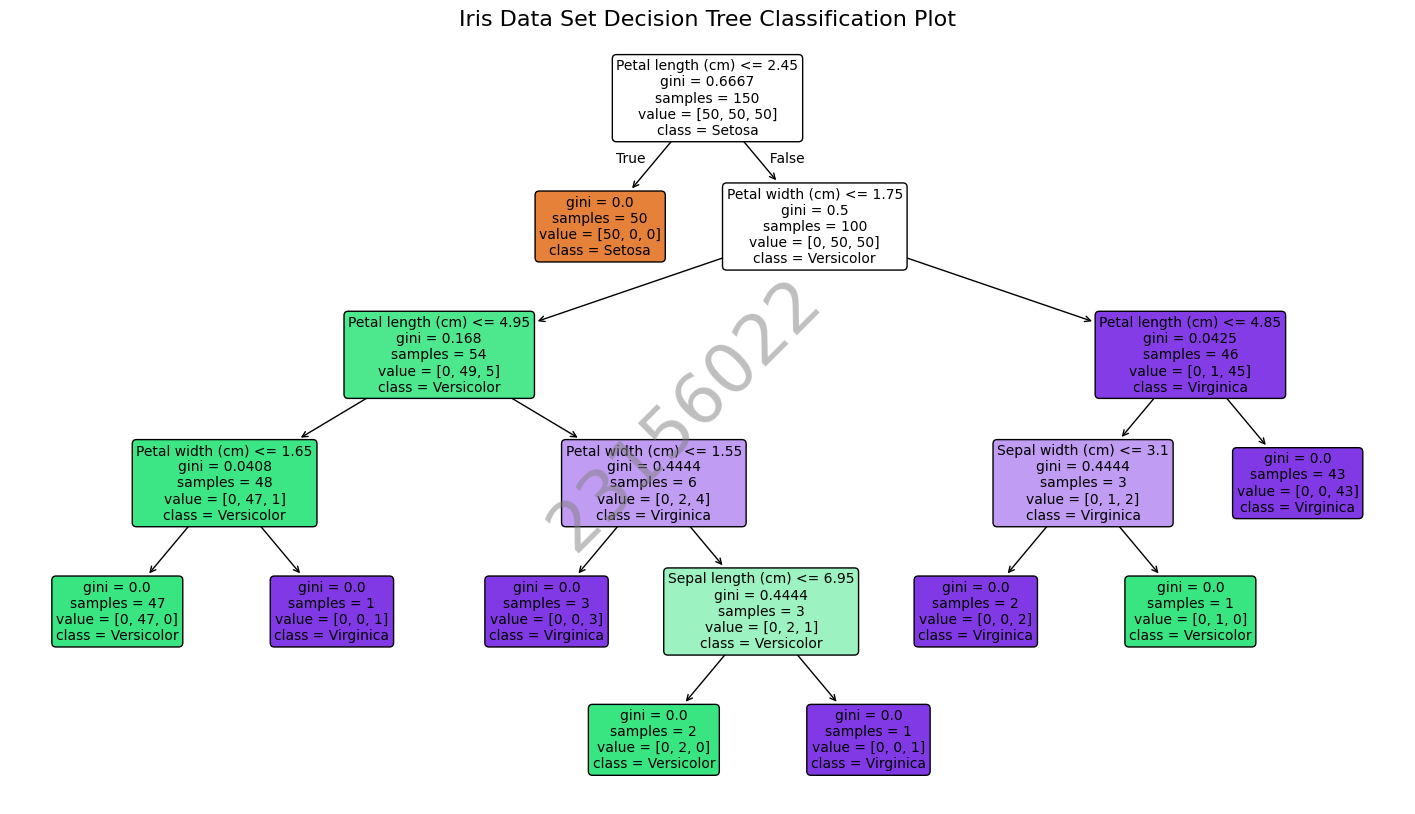

In [64]:
# Define roll number, name, email and  load the diabetes dataset
roll_number = "23156022" 
name = "Venkateswar Reddy Melachervu"
email = "vmela23@iitk.ac.in"

iris_ds = datasets.load_iris()
X = iris_ds.data
Y = iris_ds.target

# Decision tree classifier for iris dataset 
iris_dtc = DecisionTreeClassifier(random_state=1234)
iris_dtc.fit(X, Y)

# Capitalize the first letter of feature and class names
feature_names = [name.capitalize() for name in iris_ds.feature_names]
class_names = [name.capitalize() for name in iris_ds.target_names]

# Plot the decision tree for iris dataset
plt.figure(figsize=(18, 10))

iris_dtc_plot = plot_tree(
    decision_tree = iris_dtc,
    feature_names = feature_names,
    class_names = class_names,
    filled=True,
    rounded=True,
    precision=4,
    fontsize=10
)

# Add a title
plt.title("Iris Data Set Decision Tree Classification Plot", fontsize=16)

# Add watermark with roll number
plt.figtext(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.5, ha='center', va='center', rotation=45)

plt.show()



In [65]:
# Text representation of iris DTC
txt_rep_iris_dtc = tree.export_text(iris_dtc,
                                    feature_names = feature_names,
                                    show_weights=True)
print(txt_rep_iris_dtc)

|--- Petal length (cm) <= 2.45
|   |--- weights: [50.00, 0.00, 0.00] class: 0
|--- Petal length (cm) >  2.45
|   |--- Petal width (cm) <= 1.75
|   |   |--- Petal length (cm) <= 4.95
|   |   |   |--- Petal width (cm) <= 1.65
|   |   |   |   |--- weights: [0.00, 47.00, 0.00] class: 1
|   |   |   |--- Petal width (cm) >  1.65
|   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |   |--- Petal length (cm) >  4.95
|   |   |   |--- Petal width (cm) <= 1.55
|   |   |   |   |--- weights: [0.00, 0.00, 3.00] class: 2
|   |   |   |--- Petal width (cm) >  1.55
|   |   |   |   |--- Sepal length (cm) <= 6.95
|   |   |   |   |   |--- weights: [0.00, 2.00, 0.00] class: 1
|   |   |   |   |--- Sepal length (cm) >  6.95
|   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |--- Petal width (cm) >  1.75
|   |   |--- Petal length (cm) <= 4.85
|   |   |   |--- Sepal width (cm) <= 3.10
|   |   |   |   |--- weights: [0.00, 0.00, 2.00] class: 2
|   |   |   |--- Sepal width (cm) >  3.10
|  

In [66]:
def print_colored_summary():
    # Define ANSI escape codes for colors
    BLUE_BOLD = '\033[1;34m'
    GREEN = '\033[0;32m'
    RESET = '\033[0m'
    
    # Define the summary text with formatting
    summary_text = f"""
{BLUE_BOLD}Macro Average:{RESET} {GREEN}Unweighted mean across all classes, treating all classes equally.{RESET}
{BLUE_BOLD}Weighted Average:{RESET} {GREEN}Weighted mean across all classes, accounting for the number of instances in each class.{RESET}
{BLUE_BOLD}Support:{RESET} {GREEN}Refers to the number of true instances (samples) for each class in the dataset.{RESET}
"""
    # Print the formatted text
    print(summary_text)



In [67]:
# Enhanced DTC for Iris Data Set

# Split the data into training and testing sets for better performance evaluation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

# Hyperparameter tuning using GridSearchCV for the best performance
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1234), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Use the best estimator for the decision tree
best_dtc = grid_search.best_estimator_

# Train the decision tree on the entire training set
best_dtc.fit(X_train, Y_train)

# Evaluate the model on the test set
Y_pred = best_dtc.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Generate the classification report
report = classification_report(Y_test, Y_pred, target_names=iris_ds.target_names, output_dict=True)

# Convert the classification report to a DataFrame and capitalize words
df_report = pd.DataFrame(report).transpose()
df_report.index = df_report.index.str.capitalize()
df_report.columns = df_report.columns.str.capitalize()

# Display the enhanced classification report
print(df_report)
# Call the function to print the colored summary
print_colored_summary()

Accuracy: 0.9778

              Precision    Recall  F1-score    Support
Setosa         1.000000  1.000000  1.000000  16.000000
Versicolor     1.000000  0.941176  0.969697  17.000000
Virginica      0.923077  1.000000  0.960000  12.000000
Accuracy       0.977778  0.977778  0.977778   0.977778
Macro avg      0.974359  0.980392  0.976566  45.000000
Weighted avg   0.979487  0.977778  0.977886  45.000000

Macro Average: Unweighted mean across all classes, treating all classes equally.
Weighted Average: Weighted mean across all classes, accounting for the number of instances in each class.
Support: Refers to the number of true instances (samples) for each class in the dataset.



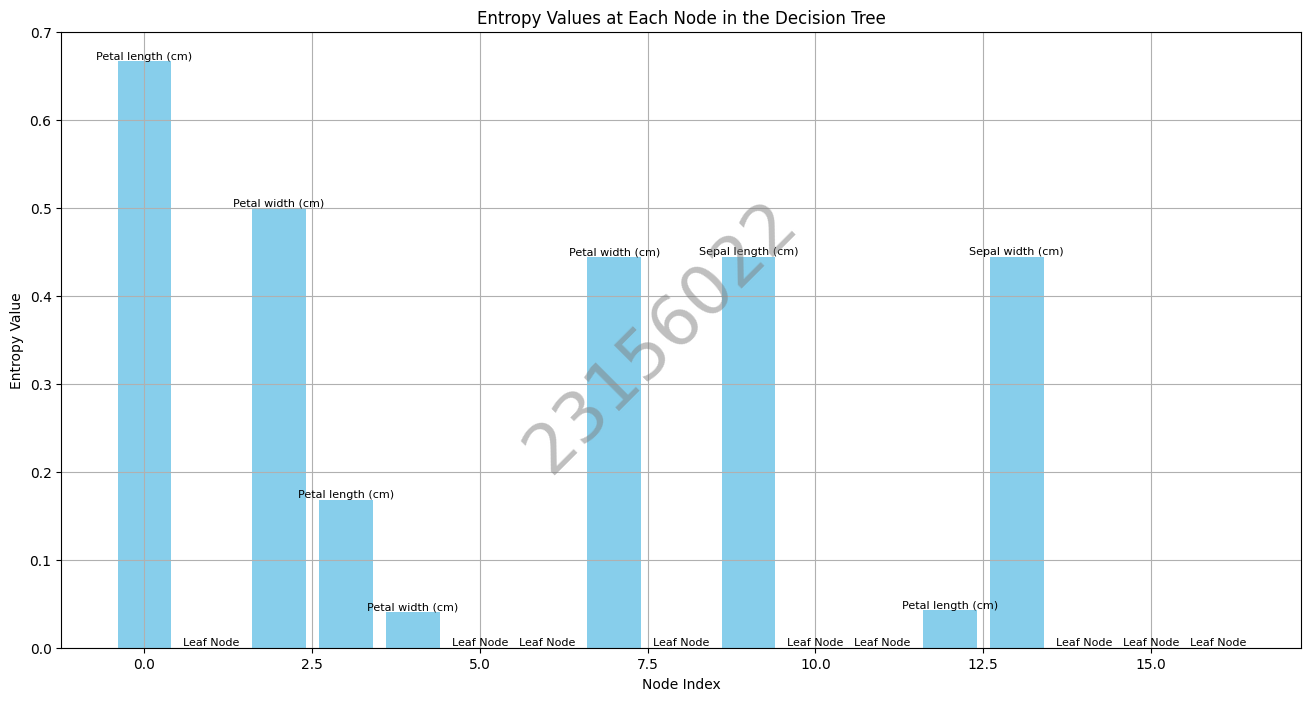

In [68]:
# Plotting entropies at decision nodes

# Extract tree information
tree_ = iris_dtc.tree_
node_indices = np.arange(tree_.node_count)
entropy_values = tree_.impurity  # Uses Gini impurity; replace with entropy if using a different criterion

# Extract feature names
feature_names = np.array(iris_ds.feature_names)
feature_names = [name.capitalize() for name in feature_names]

def get_feature_name(node_index):
    if tree_.feature[node_index] != _tree.TREE_UNDEFINED:
        feature_index = tree_.feature[node_index]
        return feature_names[feature_index]
    return 'Leaf Node'

def plot_entropy_values(tree_):
    # Extract node indices and entropy values
    node_indices = np.arange(tree_.node_count)
    entropy_values = tree_.impurity  # Replace with actual entropy values if different

    # Plot
    plt.figure(figsize=(16, 8))
    bars = plt.bar(node_indices, entropy_values, color='skyblue')
    plt.xlabel('Node Index')
    plt.ylabel('Entropy Value')
    plt.title('Entropy Values at Each Node in the Decision Tree')

    # Annotate bars with feature names
    for bar, node_index in zip(bars, node_indices):
        height = bar.get_height()
        feature_name = get_feature_name(node_index)
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, feature_name, 
                 ha='center', va='bottom', fontsize=8, color='black')
    
    plt.grid(True)
    
    # Add watermark with roll number
    plt.figtext(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.5, ha='center', va='center', rotation=45, zorder=0)
    plt.show()

# Plot entropy values with feature names
plot_entropy_values(tree_)


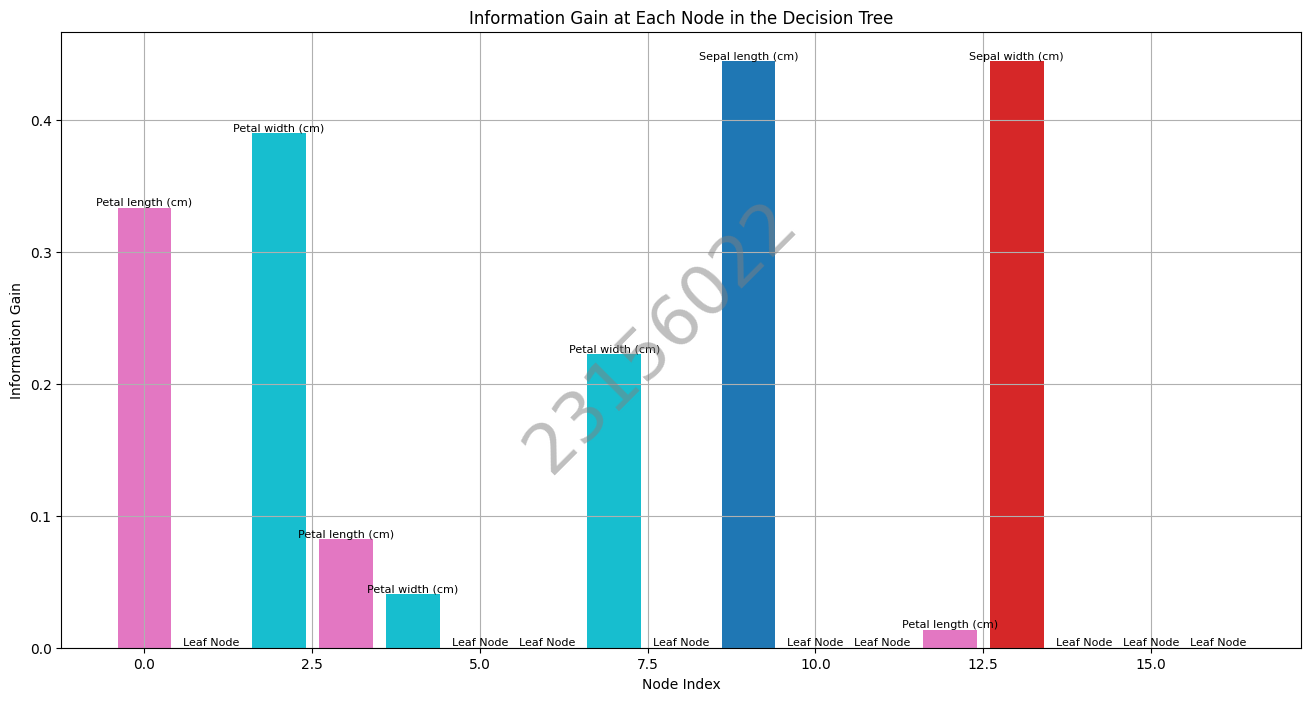

In [69]:
# Plot information gain with feature names

# Extract tree information
tree_ = iris_dtc.tree_

def get_feature_name(node_index):
    if tree_.feature[node_index] != _tree.TREE_UNDEFINED:
        feature_index = tree_.feature[node_index]
        return feature_names[feature_index]
    return 'Leaf Node'

def compute_information_gain(tree_):
    # Get the entropy of the nodes
    node_entropy = tree_.impurity
    # Initialize arrays to store information gains
    info_gain = np.zeros(tree_.node_count)

    # Traverse nodes and compute information gain
    for node in range(tree_.node_count):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            # Get the feature used for the split
            feature_index = tree_.feature[node]
            # Get child node indices
            left_child = tree_.children_left[node]
            right_child = tree_.children_right[node]

            if left_child != _tree.TREE_UNDEFINED and right_child != _tree.TREE_UNDEFINED:
                # Calculate weighted entropy of the child nodes
                left_weight = tree_.weighted_n_node_samples[left_child]
                right_weight = tree_.weighted_n_node_samples[right_child]
                total_weight = left_weight + right_weight

                left_entropy = tree_.impurity[left_child]
                right_entropy = tree_.impurity[right_child]

                # Calculate information gain
                info_gain[node] = node_entropy[node] - (left_weight / total_weight * left_entropy +
                                                        right_weight / total_weight * right_entropy)
    
    return info_gain

def plot_information_gain(tree_):
    # Extract feature names
    feature_names = np.array(iris_ds.feature_names)
    feature_names = [name.capitalize() for name in feature_names]

    # Compute information gain for each node
    info_gain = compute_information_gain(tree_)

    # Get unique features used in the decision tree
    used_features = np.unique(tree_.feature[tree_.feature != _tree.TREE_UNDEFINED])
    feature_colors = plt.get_cmap('tab10')(np.linspace(0, 1, len(used_features)))

    # Map feature indices to colors
    feature_color_map = {feature: feature_colors[i] for i, feature in enumerate(used_features)}

    # Plot
    plt.figure(figsize=(16, 8))
    
    # Assign colors to bars
    bar_colors = [feature_color_map[tree_.feature[i]] if tree_.feature[i] != _tree.TREE_UNDEFINED else 'lightgray' 
                  for i in range(tree_.node_count)]
    bars = plt.bar(np.arange(tree_.node_count), info_gain, color=bar_colors)
    plt.xlabel('Node Index')
    plt.ylabel('Information Gain')
    plt.title('Information Gain at Each Node in the Decision Tree')

    # Annotate bars with feature names
    for bar, node_index in zip(bars, np.arange(tree_.node_count)):
        height = bar.get_height()
        feature_index = tree_.feature[node_index]
        if feature_index != _tree.TREE_UNDEFINED:
            feature_name = feature_names[feature_index]
        else:
            feature_name = 'Leaf Node'
        
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, feature_name, 
                 ha='center', va='bottom', fontsize=8, color='black')

    plt.grid(True)
    # Add watermark with roll number
    plt.figtext(0.5, 0.5, roll_number, fontsize=50, color='gray', alpha=0.5, 
                ha='center', va='center', rotation=45, zorder=0)
    plt.show()

# Plot information gain with feature names
plot_information_gain(tree_)


In [70]:
!jupyter nbconvert --to pdf Proj_08_DT_IRIS_Dataset_Full.ipynb


[NbConvertApp] Converting notebook Proj_08_DT_IRIS_Dataset_Full.ipynb to pdf
[NbConvertApp] Support files will be in Proj_08_DT_IRIS_Dataset_Full_files\
[NbConvertApp] Making directory .\Proj_08_DT_IRIS_Dataset_Full_files
[NbConvertApp] Writing 51387 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 310237 bytes to Proj_08_DT_IRIS_Dataset_Full.pdf
